RISKFOLIO MODEL


In [2]:
#importing the riskfolio model
import pandas as pd
import riskfolio as rp

IMPORT DATA AND SLICE 

In [3]:
Y = pd.read_pickle('Asset_Data.pkl')
Y

,ABBV,ADBE,AMZN,AVGO,BRK-B,COST,CRM,CSCO,CVX,GOOG,...,MRK,MSFT,NVDA,PEP,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-06,0.025826,0.016422,0.006413,0.009291,0.000320,0.002295,0.011662,0.003524,0.001291,0.014142,...,0.009085,0.014034,0.018951,0.000091,0.001263,-0.000841,0.001038,0.006002,-0.000709,0.000243
2018-07-09,0.001238,0.006366,0.016596,-0.001009,0.011090,0.006297,0.002546,-0.000936,0.014903,0.012174,...,-0.002894,0.006821,0.007763,-0.016429,-0.018283,0.031110,0.011605,0.010665,0.016802,0.006923
2018-07-10,0.018549,-0.004564,0.002329,0.012650,0.001371,0.003603,0.004867,0.004453,0.012699,-0.001049,...,0.004514,0.002651,0.016048,0.047606,0.025173,0.012433,0.007372,0.008634,0.014896,0.009167
2018-07-11,-0.039256,-0.002051,0.006844,-0.028416,0.000053,-0.003543,0.019656,-0.006766,-0.031899,0.000919,...,-0.006420,-0.001371,-0.022586,-0.003100,-0.008269,-0.010885,-0.003718,0.010681,-0.007797,-0.012790
2018-07-12,0.017128,0.027205,0.023715,-0.137447,0.000263,0.014553,0.020034,0.023726,0.005991,0.025635,...,0.012278,0.021671,0.014948,-0.008975,-0.003411,-0.007054,0.005735,0.012667,-0.000115,0.001211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27,-0.017414,0.020354,0.014529,0.032582,0.003651,0.013202,0.007041,0.012946,-0.003117,-0.000672,...,0.002122,0.018168,0.030616,0.007193,0.009488,0.038000,0.007306,0.004596,-0.003612,0.002493
2023-06-28,-0.000679,-0.013980,-0.001084,-0.000542,-0.003549,0.004657,0.016042,0.000197,0.009054,0.017393,...,-0.007766,0.003826,-0.018125,-0.013532,-0.000200,0.024100,-0.016806,0.002727,0.005437,0.008130
2023-06-29,0.005434,0.002778,-0.008834,0.017254,0.008260,-0.002083,-0.008201,0.006684,0.008521,-0.008837,...,0.009783,-0.002382,-0.007175,0.000980,-0.004067,0.004917,0.004194,0.027900,-0.006760,0.012334


In [4]:
#Manually importing a cluster from Asset_Quant_Data
#In this case we're using cluster 2

cluster2 = Y[['NVDA', 'TSLA']]
cluster2

,NVDA,TSLA
Date,,
2018-07-06,0.018951,-0.000841
2018-07-09,0.007763,0.031110
2018-07-10,0.016048,0.012433
2018-07-11,-0.022586,-0.010885
2018-07-12,0.014948,-0.007054
...,...,...
2023-06-27,0.030616,0.038000
2023-06-28,-0.018125,0.024100
2023-06-29,-0.007175,0.004917


In [13]:
#pd.options.display.float_format = '{:.4%}'.format

# Building the portfolio object
port = rp.Portfolio(returns=cluster2)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 2.5 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,NVDA,TSLA
weights,0.473656,0.526344


In [14]:
# Calculating the efficient frontier for the portfolio

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,NVDA,TSLA
0,0.698265,0.301735
1,0.605602,0.394398
2,0.567004,0.432996
3,0.537239,0.462761
4,0.512023,0.487977


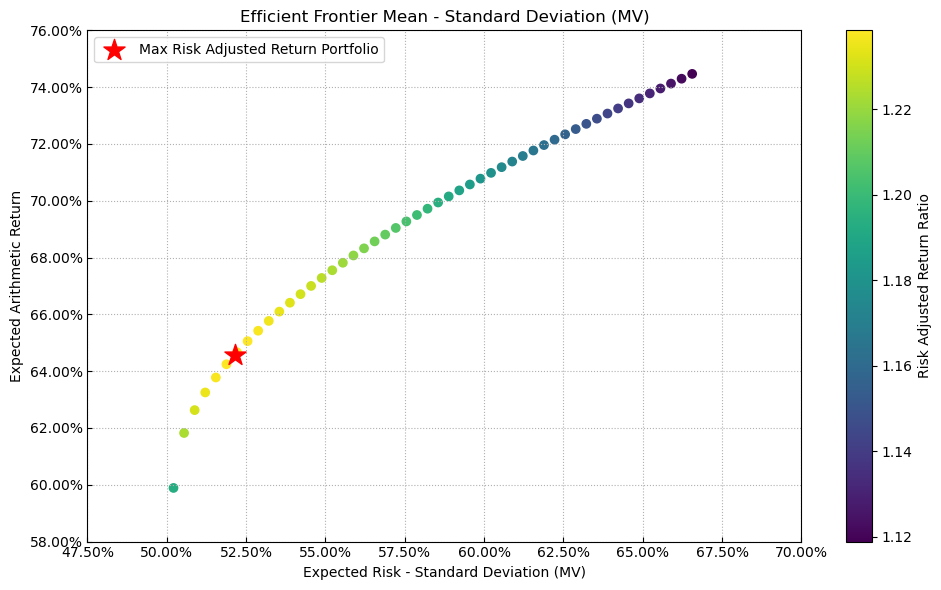

In [15]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                        ax=None)

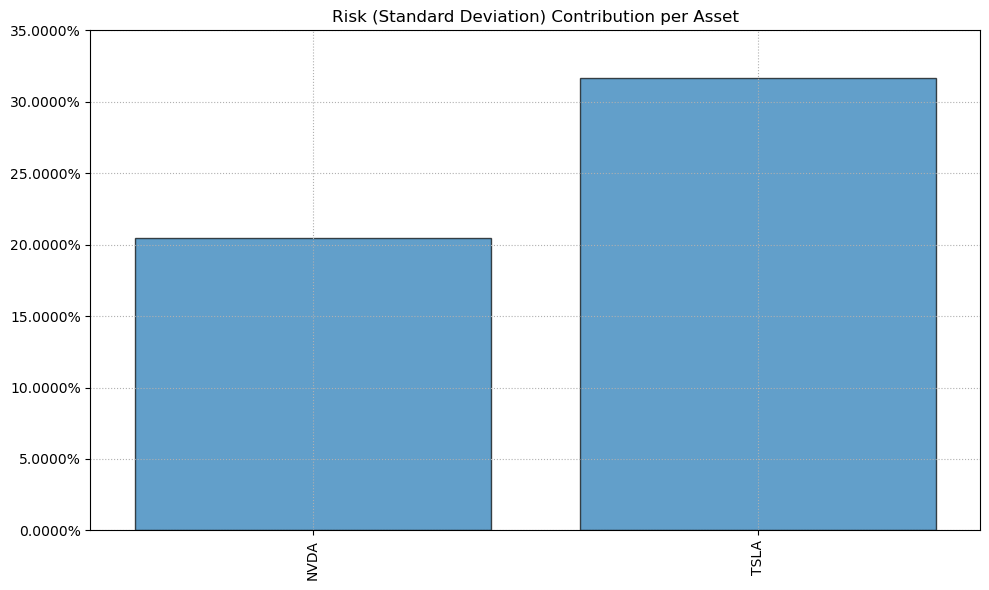

In [16]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)